## Question 2. CLUSTERING

 ## Import Libraries and Read Dataset

In [96]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib online

#For clustering 
from sklearn.cluster import KMeans,MeanShift
from sklearn.metrics import silhoutte.score

#For scaling 
from sklearn.preprocessing import StandardScaler
plt.style.use("ggplot")

In [2]:
# Path to datasets
# read csv files
df = pd.read_csv('country_data.csv')

In [ ]:
<div class="alert alert-info" style="background-color:#F5C647; color:black; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. Overview of the Data</h2>
</div>

Before delving into model development, it is essential to obtain perfect understanding of the data.

Here we would:
- Obtain the descriptive statistics of the Country dataset
- Obtain the information about missing values in the dataset if any

In [4]:
# first 5 rows of  dataset
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
# shape of dataset after dropped column
df.shape

(167, 10)

In [7]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
#some basic statistical data
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


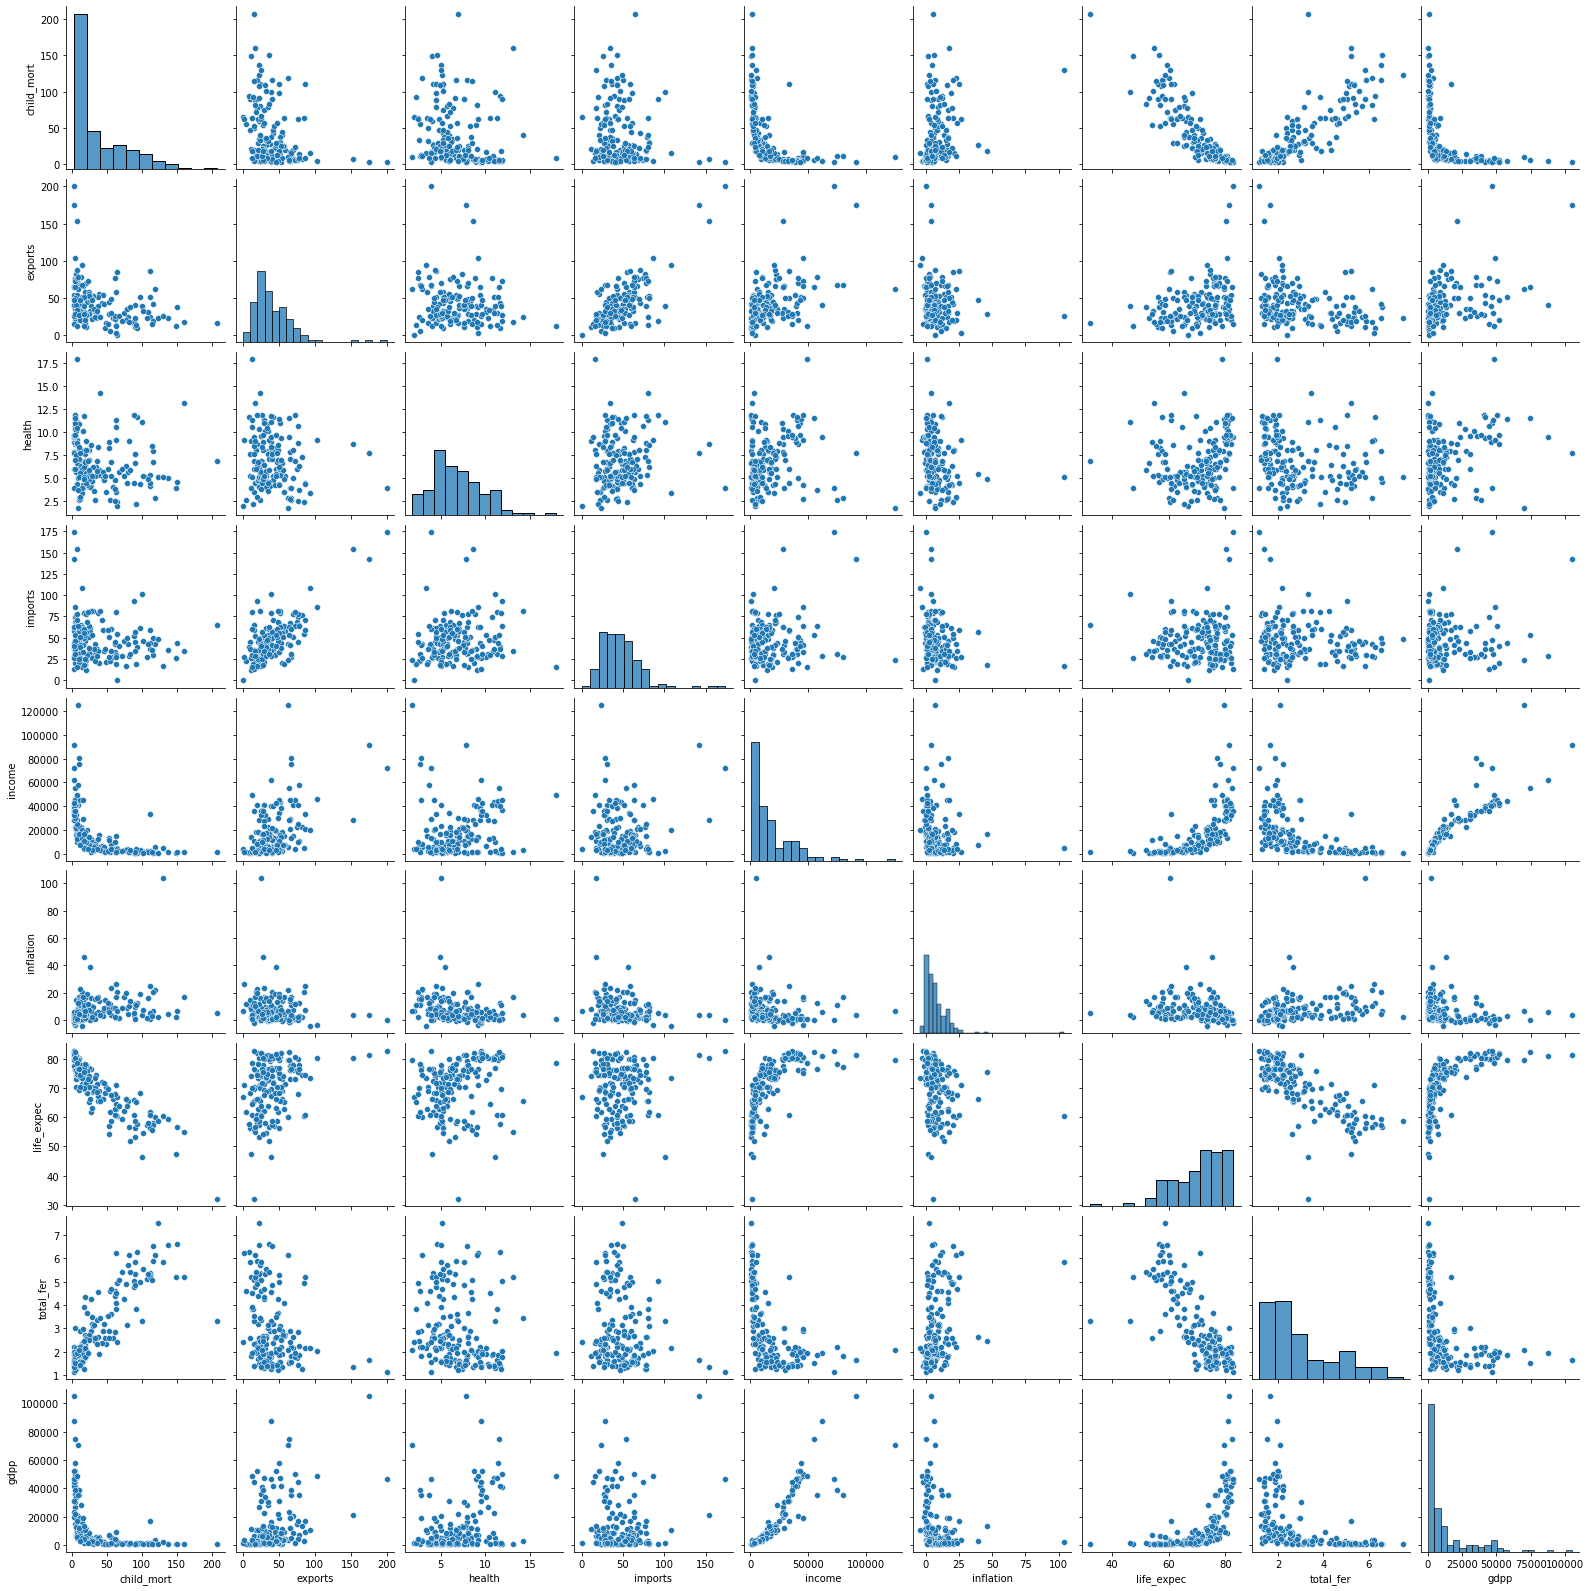

In [9]:
#plots to see relationship between features
sns.pairplot(df)

### Comment 
gdpp has a linear relationship with health, imports and income but it is negatively correlated with child mort.

<AxesSubplot:>

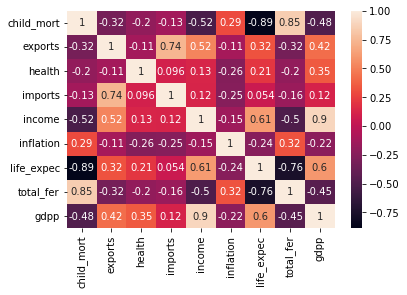

In [10]:
#heatmap to see correlations between features
sns.heatmap(df.corr() ,annot=True )

### Comment
From the heatmap it can be said that:
gdpp and income(0.9),
1. life_expec(0.6) 
2. and exports(0.4) are highly positive correlated
3. whereas  and child_mort(-0.48)
4.  total fertility(-0.45) are highly negative correlated

In [11]:
#To check for null value 
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [12]:
#to check number of unique countries
df['country'].nunique()

167

### Comments
1. Export, Health and Imports are given in in percentage of gdppand hence we have to convert it.
2. there is only one categorical column, all other columns are numerical
3. there is no missing value in the dataset and the dataset is clean

In [14]:
# Columns in file to be dropped
df1 = df.drop(['country'],axis=1)
#the country column has been dropped 
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [122]:
#To change exports,health and imports that are a fraction of gdpp to its orginal value
df[['exports','health', 'imports']] = df[['exports','health', 'imports']].apply(lambda x : x * df['gdpp']/100)


In [16]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## Scaling of the dataset


In [17]:
standard_scaler = StandardScaler()
df_updated = df.iloc[:,:]
df_scaled =standard_scaler.fit_transform(df_updated.iloc[:,1:]) 
print(df_scaled)

[[ 1.29153238 -0.4110113  -0.56503989 ... -1.61909203  1.90288227
  -0.67917961]
 [-0.5389489  -0.35019096 -0.43921769 ...  0.64786643 -0.85997281
  -0.48562324]
 [-0.27283273 -0.31852577 -0.48482608 ...  0.67042323 -0.0384044
  -0.46537561]
 ...
 [-0.37231541 -0.36146329 -0.53848844 ...  0.28695762 -0.66120626
  -0.63775406]
 [ 0.44841668 -0.39216643 -0.55059641 ... -0.34463279  1.14094382
  -0.63775406]
 [ 1.11495062 -0.38395214 -0.54049845 ... -2.09278484  1.6246091
  -0.62954556]]


C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


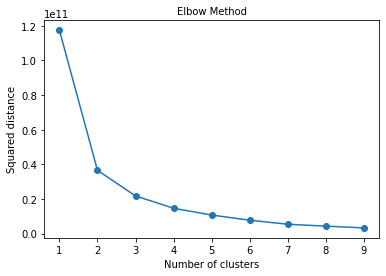

In [18]:
distortions =[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(df1)
    distortions.append(kmean.inertia_)
    
plt.plot(K,distortions,marker='o')
plt.title('Elbow Method',fontsize=10)
plt.xlabel('Number of clusters',fontsize=10)
plt.ylabel('Squared distance',fontsize=10)
plt.show()

In [19]:
kmeans = KMeans(n_clusters = 3,random_state = 55)
kmeans.fit(df_scaled)

KMeans(n_clusters=3, random_state=55)

In [25]:
#calculate how good our model is
#calculate Silhouette Coefficient for K=3
from sklearn import metrics
metrics.silhouette_score(df_scaled, kmeans.labels_)

0.4218615812599681

In [20]:
pd.Series(kmeans.labels_).value_counts()

2    91
0    48
1    28
dtype: int64

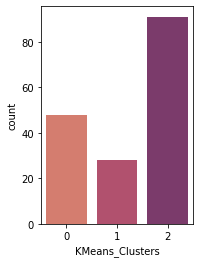

In [95]:
plt.subplot(1, 2, 1)
fig1 = sns.countplot(data=df, x="KMeans_Clusters", palette='flare')
fig1.set_xticklabels(["0", "1","2"])
plt.show()

In [21]:
cluster_labels = kmeans.fit_predict(df_scaled)

In [22]:
preds = kmeans.labels_
df_kmeans = pd.DataFrame(df)
df_kmeans['KMeans_Clusters'] = preds
df_kmeans.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2


In [27]:
#save a kmeans file
df_kmeans.to_csv('kmeans_result.csv',index=False)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


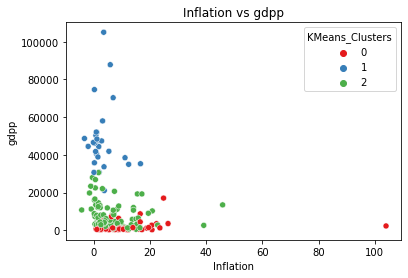

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


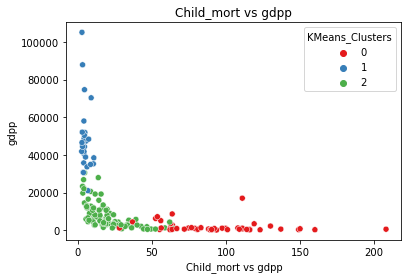

<Figure size 432x288 with 0 Axes>

In [126]:
#visulization of clusters child mortality vs gdpp
sns.scatterplot(df_kmeans['inflation'],df_kmeans['gdpp'],hue='KMeans_Clusters',palette="Set1", data=df_kmeans)
plt.title("Inflation vs gdpp")
plt.xlabel("Inflation")
plt.ylabel("gdpp")
plt.show()
plt.tight_layout()
sns.scatterplot(df_kmeans['child_mort'],df_kmeans['gdpp'],hue='KMeans_Clusters',palette="Set1", data=df_kmeans)
plt.title("Child_mort vs gdpp")
plt.xlabel("Child_mort vs gdpp")
plt.ylabel("gdpp")
plt.show()
plt.tight_layout()


### Comment
From the graph above inflation is low in the blue clustered countries with a high gdpp , the red clustered countries have low inflation and low gdpp, the green clustered countries have relatively average inflation and average gdpp compared to the other countries observed, now to infer this to a real-life scenario, the blue clustered countries are possibly developed countries while the green developing and the red under-developed. 

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


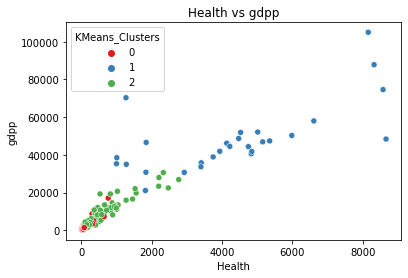

In [37]:
sns.scatterplot(df_kmeans['health'],df_kmeans['gdpp'],hue='KMeans_Clusters',palette="Set1", data=df_kmeans) 
plt.title("Health vs gdpp")
plt.xlabel("Health")
plt.ylabel("gdpp")
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


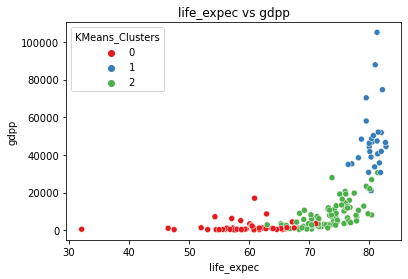

In [83]:
sns.scatterplot(df_kmeans['life_expec'],df_kmeans['gdpp'],hue='KMeans_Clusters',palette="Set1", data=df_kmeans) 
plt.title("life_expec vs gdpp")
plt.xlabel("life_expec")
plt.ylabel("gdpp")
plt.show()

### Comment
From the graph above life ecpectancy of the blue clustered countries is high and it increases with gdpp and the gdpp of the red clustered countries is low and degreases with life expectancy, the green clustered countries are just at the midpoint of the other clusters, we can deduce that high gdpp and high life expectancy is the developed country, low gdpp and low life expectancy is an under-developed country.

In [129]:
under_developed=df_kmeans[df_kmeans['KMeans_Clusters']==0]['country']
developed=df_kmeans[df_kmeans['KMeans_Clusters']==1]['country']
developing=df_kmeans[df_kmeans['KMeans_Clusters']==2]['country']

print("Number of under-developed countries",len(under_developed))
print("Number of developing countries",len(developing))
print("Number of developed countries",len(developed))

Number of under-developed countries 48
Number of developing countries 91
Number of developed countries 28


In [130]:
#list of developed countries
list(developed)

['Australia',
 'Austria',
 'Belgium',
 'Brunei',
 'Canada',
 'Cyprus',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Iceland',
 'Ireland',
 'Italy',
 'Japan',
 'Kuwait',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Qatar',
 'Singapore',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States']

In [131]:
#list of developing countries
list(developed)

['Australia',
 'Austria',
 'Belgium',
 'Brunei',
 'Canada',
 'Cyprus',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Iceland',
 'Ireland',
 'Italy',
 'Japan',
 'Kuwait',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Qatar',
 'Singapore',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States']

In [132]:
#list of under-developing countries
list(under_developed)

['Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

Let's check that is Nigeria is present in under-developed countries list

In [133]:
for n in under_developed:
    if n == 'Nigeria':
        print('Yes', n , 'is present in under_developed countries list')

Yes Nigeria is present in under_developed countries list


In [99]:
ms_df = df1.iloc[:,:-1]

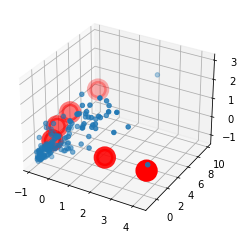

In [128]:
ms = MeanShift()
ms.fit(df_scaled)
cluster_centers = ms.cluster_centers_
ms_clusters = ["0", "1", "2"]
cluster_labels = ms.fit_predict(df_scaled)
# Finally We plot the data points
# and centroids in a 3D graph.
fig = plt.figure()
clusters=3
ax = fig.add_subplot(111, projection ='3d')
  
ax.scatter(df_scaled[:, 0], df_scaled[:, 5], df_scaled[:, 7], marker ='o')
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker ='o', color ='red',
           s = 300, linewidth = 5, zorder = 10)
  
plt.show()

## Conclusion
1. Gdpp, income and child_mort are the 3 main driving factors for the clustering 
2. In under-developed countries life expectancy is low due to high child mortality rate 
3. Low income and low gdpp show high child mortality rates.